In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("D:\\Academic\\sem 6\\ML\\Lab\\lab 10\\iris.csv")
df=pd.DataFrame(iris)
df.head()
x=df.drop(['Id','Species'],axis=1)
print(x.head())
y=df.Species
print(y.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Species, dtype: object


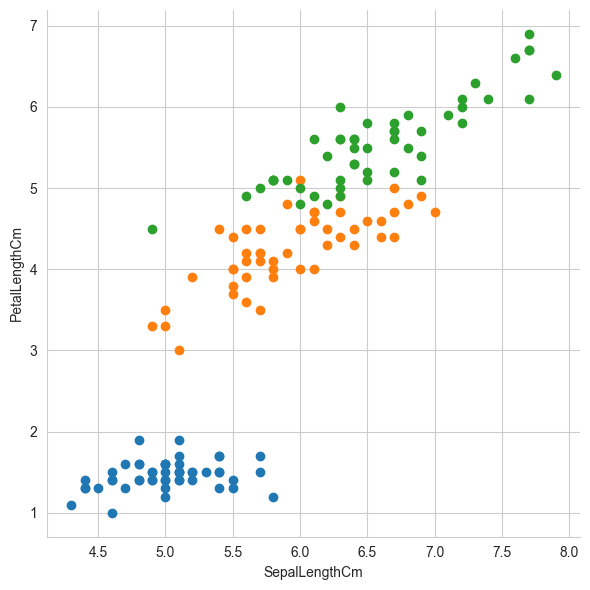

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue='Species',height=6).map(plt.scatter,'SepalLengthCm','PetalLengthCm')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)
print(X[:5])
type(X)
print(X.shape[0])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
150


In [4]:
X_mean = np.mean(X, axis=0)
print(X_mean)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0])
print('Covariance matrix \n%s' %cov_mat)


[-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
Covariance matrix 
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [6]:
pc1=X.dot(eig_vecs.T[0])
pc2=X.dot(eig_vecs.T[1])
result = pd.DataFrame(pc1,columns=['PC1'])
result['PC2']=pc2
result['species']=y
result.head()


,PC1,PC2,species
0,-2.264703,-0.480027,Setosa
1,-2.080961,0.674134,Setosa
2,-2.364229,0.341908,Setosa
3,-2.299384,0.597395,Setosa
4,-2.389842,-0.646835,Setosa


<Figure size 3000x1000 with 0 Axes>

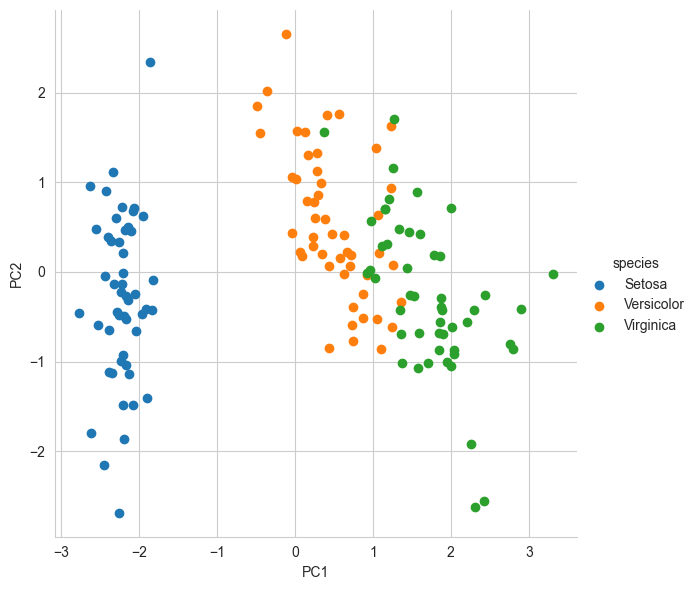

In [7]:
plt.figure(figsize=(30,10))
sns.FacetGrid(result,hue='species',height=6).map(plt.scatter,'PC1','PC2').add_legend(legend_data=None)
plt.show()
